<a href="https://colab.research.google.com/github/Asim927/Task-11/blob/main/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline



In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

print(X.shape)
print(np.bincount(y))   # check label distribution


(569, 30)
[212 357]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)

print("Linear Accuracy:", svm_linear.score(X_test_scaled, y_test))


Linear Accuracy: 0.956140350877193


In [6]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

print("RBF Accuracy:", svm_rbf.score(X_test_scaled, y_test))


RBF Accuracy: 0.9824561403508771


In [7]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

grid = GridSearchCV(SVC(kernel='rbf', probability=True),
                    param_grid,
                    cv=5)

grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_


Best Params: {'C': 1, 'gamma': 'scale'}


In [8]:
y_pred = best_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



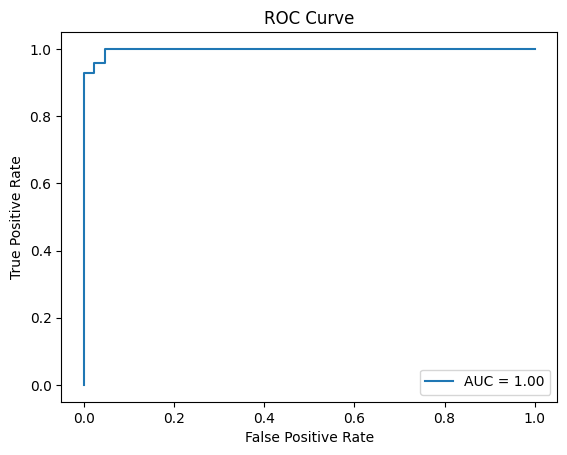

In [9]:
y_prob = best_model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [10]:
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=grid.best_params_['C'],
                gamma=grid.best_params_['gamma'],
                probability=True))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "svm_breast_cancer_model.pkl")


['svm_breast_cancer_model.pkl']